In [1]:
# notebeook to analyze errors from systems predictions on a few different settings
import numpy as np
from setretrieval.utils.utils import pickload, pickdump
from datasets import Dataset, DatasetDict
from setretrieval.datagen.toydata import chunk_ds, process_ngrams
from collections import Counter
from statistics import mean
import matplotlib.pyplot as plt
from statistics import mean
import random
import os

/accounts/projects/sewonm/prasann/.conda/envs/scaling7/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fiqares = pickload("../propercache/cache/setresults/nanomsmarco_evalset.pkl")

In [3]:
for k in fiqares.keys():
    print(k)
    print(mean(fiqares[k]['recall']))


bm25-bm25-10-propercache_data_datastores_nanomsmarco_corpus
0.74
bm25-bm25-1-propercache_data_datastores_nanomsmarco_corpus
0.32
single-Qwen/Qwen3-Embedding-0.6B-1-propercache_data_datastores_nanomsmarco_corpus
0.4
single-Qwen/Qwen3-Embedding-8B-1-propercache_data_datastores_nanomsmarco_corpus
0.48
single-propercache/cache/sbert_training/contrastive-Qwen_Qwen3-Embedding-0.6B-bs64-e1-lr3e-06-msmarco_100k-sbert-1-propercache_data_datastores_nanomsmarco_corpus
0.3
singcolbert-propercache/cache/colbert_training/contrastive-Qwen_Qwen3-Embedding-0.6B-bs64-e1-lr3e-06-msmarco_100k-maxsim-divd0.0-divq0.0-qv1-dv1-cosine-temp0.02-omodneither-dodefaulttrainno-embsize1024-1-propercache_data_datastores_nanomsmarco_corpus
0.24
single-propercache/cache/sbert_training/contrastive-Qwen_Qwen3-Embedding-0.6B-bs64-e1-lr6e-05-msmarco_100k-sbert-1-propercache_data_datastores_nanomsmarco_corpus
0.3
single-propercache/cache/sbert_training/contrastive-facebook_opt-350m-bs64-e1-lr6e-05-msmarco_100k-sbert-1-prope

In [2]:
setbase = "../propercache/cache/setresults/"
setresopts = os.listdir(setbase)

In [3]:
setresopts = [x for x in setresopts if "fiqa" in x and ".jsonl" in x]

In [4]:
ds = Dataset.from_json(setbase + setresopts[0])

Generating train split: 648 examples [00:00, 4340.68 examples/s]


In [3]:
ndata = pickload("../propercache/cache/setresults/wiki_newpipetest_qwen4bsingle_preds2_geminiprocomps.pkl")

In [17]:
vals = [set(range(100)) - (set(ndata[0][i]).union(set(ndata[1][i]))) for i in range(len(ndata[0]))]
mean([mean(l) for l in vals if len(l) > 0])

38.23027194737393

In [19]:
mean(mean(l) for l in ndata[1] if len(l) > 0)

52.35826429210553

In [ ]:

# get true positives, false positives, false negatives for each query
def getconfs(allpreds, allgolds, dofilt=False):
    tps, fps, fns = [], [], []
    for i in range(len(allpreds)):
        golds = set(allgolds[i])
        if dofilt and (len(golds) < 10 or len(golds) > 50):
            continue
        preds = set(allpreds[i])
        tps.append(golds.intersection(preds))
        fps.append(preds.difference(golds))
        fns.append(golds.difference(preds))
    return tps, fps, fns

evset = Dataset.load_from_disk("../propercache/data/evalsets/wiki_newpipetest")
apreds, agolds = pickload("../propercache/cache/setresults/wiki_newpipetest.pkl")
tps, fps, fns = getconfs(apreds, agolds)

In [5]:
allpreds = pickload("../propercache/cache/setresults/v2testset150words50pos.pkl")
for k in allpreds.keys():
    print(k)
    print(mean(allpreds[k]['recall']))

colbert-propercache/cache/colbert_training/contrastive-google-bert_bert-large-uncased-bs8-e1-lr2e-05-v2nountrain100000rand150dwords-maxsim-divd0.0-divq0.0-qv8-dv512-cosine-temp0.5-omodneither-dodefaulttrainyes-50-propercache_data_datastores_v2evaltdstore150words50pos100k
0.00028000000000000003


In [5]:
evs = Dataset.from_json("../propercache/cache/setresults/wiki_newpipetest_gut90ktrain_preds2.jsonl")

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 127 examples [00:00, 358.41 examples/s]


In [2]:
evs = Dataset.from_json("../propercache/cache/setresults/v2testset50words250pos_bertlarge50dwordstrain_preds2.jsonl")

Generating train split: 500 examples [00:02, 202.34 examples/s]


In [8]:
len(set(evs[0]['golds']) & set(evs[0]['preds']))

246

In [ ]:
ind = 16
print(evset[ind]['question'])
# print(tps[ind])
print("found ", len(tps[ind]), "missed ", len(fns[ind]))
print("TRUE POSITIVES")
for t in list(tps[ind])[:5]:
    print("***\n", t)
print("FALSE POSITIVES")
for f in list(fps[ind])[:5]:
    print("***\n", f)
print("FALSE NEGATIVES")
for f in list(fns[ind])[:5]:
    print("***\n", f)

In [ ]:
usekey = "e5notrainwiki" # "guttraine5"
ds = Dataset.load_from_disk("../propercache/data/datastores/wikipedia_docs_10k_decont")
chunks1, golds1 = pickload("../propercache/cache/setresults/wiki_newpipetest_" + usekey + "_preds.pkl")

In [ ]:
# get true positives, false positives, false negatives for each query
def getconfs(allpreds, allgolds, dofilt=False):
    tps, fps, fns = [], [], []
    for i in range(len(allpreds)):
        golds = set(allgolds[i])
        if dofilt and (len(golds) < 10 or len(golds) > 50):
            continue
        preds = set(allpreds[i])
        tps.append(golds.intersection(preds))
        fps.append(preds.difference(golds))
        fns.append(golds.difference(preds))
    return tps, fps, fns

ares = pickload("../propercache/cache/setresults/wiki_newpipetest.pkl")

In [5]:
ares = pickload("../propercache/cache/setresults/wiki_newpipetest.pkl")

In [13]:
mean(ares['single-Qwen/Qwen3-Embedding-4B-100-propercache_data_datastores_wikipedia_docs_10k_decont']['recall'])

0.43216696387372205

In [32]:
# do a paired bootstrap (given 2 lists of recall numbers, sample with replacement N times and see how often mean of A > mean of B)
def paired_bootstrap(A, B, N=1000, ss=None):
    abetter = []
    for i in range(N):
        a = random.choices(A, k=len(A) if ss is None else ss)
        b = random.choices(B, k=len(B) if ss is None else ss)
        abetter.append(mean(a) - mean(b))
    return mean(abetter), mean([abetter[i] > 0 for i in range(len(abetter))])

bkey = "colbert-propercache/cache/colbert_training/contrastive-google-bert_bert-large-uncased-bs8-e1-lr3e-05-gemini_ntrain_ptest-maxsim-div1.0-qlen32-cosine-100-propercache_data_datastores_wikipedia_docs_10k_decont"
bkey = "colbert-propercache/cache/colbert_training/contrastive-intfloat_multilingual-e5-large-instruct-bs8-e1-lr2e-05-gemini_gutenbergtrain-maxsim-divd0.0-divq1.0-qv32-dv511-cosine-temp0.02-omodneither-dodefaulttrainyes-100-propercache_data_datastores_wikipedia_docs_10k_decont"
bkey = "colbert-propercache/cache/colbert_training/contrastive-intfloat_multilingual-e5-large-instruct-bs8-e1-lr2e-05-gemini_gutenbergtrain-maxsim-divd0.0-divq1.0-qv32-dv511-cosine-temp0.02-omodneither-dodefaulttrainyes-100-propercache_data_datastores_wikipedia_docs_10k_decont"
akey = "single-Qwen/Qwen3-Embedding-4B-100-propercache_data_datastores_wikipedia_docs_10k_decont"
akey = "colbert-propercache/cache/colbert_training/contrastive-google-bert_bert-large-uncased-bs8-e1-lr3e-05-wiki_gemini_mini_train_full-maxsim-div1.0-qlen32-cosine-100-propercache_data_datastores_wikipedia_docs_10k_decont"
paired_bootstrap(
    # ares['single-Qwen/Qwen3-Embedding-4B-100-propercache_data_datastores_wikipedia_docs_10k_decont']['recall'],
    ares[akey]['recall'], 
    ares[bkey]['recall'], 
    # ares['single-Qwen/Qwen3-Embedding-0.6B-100-propercache_data_datastores_wikipedia_docs_10k_decont']['recall'], 
)

(0.047073855922335685, 0.931)

In [24]:
mean(ares['colbert-propercache/cache/colbert_training/contrastive-google-bert_bert-large-uncased-bs8-e1-lr3e-05-gemini_ntrain_ptest-maxsim-div1.0-qlen32-cosine-100-propercache_data_datastores_wikipedia_docs_10k_decont']['recall'])

0.36357876136342543

In [27]:
for p in ares.keys():
    print(p)
    print(mean(ares[p]['recall']))

colbert-propercache/cache/colbert_training/contrastive-Qwen_Qwen3-Embedding-0.6B-bs8-e1-lr3e-05-gemini_ntrain_ptest-maxsim-div1.0-qlen32-cosine-100-propercache_data_datastores_wikipedia_docs_10k_decont
0.07594518156413126
colbert-propercache/cache/colbert_training/contrastive-google-bert_bert-base-uncased-bs8-e1-lr3e-05-gemini_ntrain_ptest-maxsim-div1.0-qlen32-cosine-100-propercache_data_datastores_wikipedia_docs_10k_decont
0.2626268449341089
colbert-propercache/cache/colbert_training/contrastive-google-bert_bert-large-uncased-bs8-e1-lr3e-05-gemini_ntrain_ptest-maxsim-div1.0-qlen32-cosine-100-propercache_data_datastores_wikipedia_docs_10k_decont
0.36357876136342543
single-Qwen/Qwen3-Embedding-0.6B-100-propercache_data_datastores_wikipedia_docs_10k_decont
0.33553995996000785
single-Qwen/Qwen3-Embedding-4B-100-propercache_data_datastores_wikipedia_docs_10k_decont
0.43216696387372205
single-propercache/cache/sbert_training/contrastive-Qwen_Qwen3-Embedding-0.6B-bs1-e1-lr3e-05-sbert-gemini_

In [9]:
# for wiki task (trained on gutenberg)
usekey = "e5notrainwiki" # "guttraine5"
ds = Dataset.load_from_disk("../propercache/data/datastores/wikipedia_docs_10k_decont")
chunks1, golds1 = pickload("../propercache/cache/setresults/wiki_newpipetest_" + usekey + "_preds.pkl")
chunks2, golds2 = pickload("../propercache/cache/setresults/wiki_newpipetest_guttraine5_preds.pkl")
evset = Dataset.load_from_disk("../propercache/data/evalsets/wiki_newpipetest") # figure out n-gram counts for each chunk

In [10]:
tps1, fps1, fns1 = getconfs(chunks1, golds1)
tps2, fps2, fns2 = getconfs(chunks2, golds2)

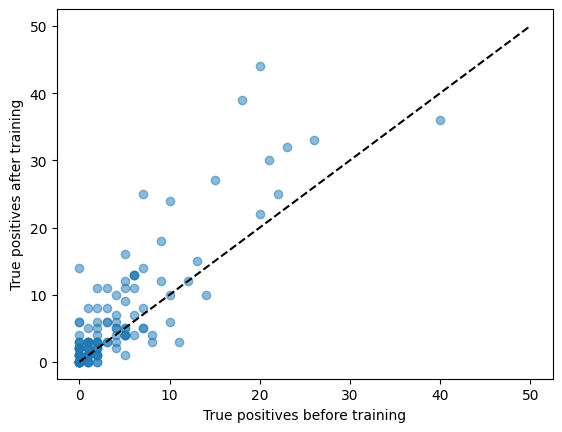

In [28]:
plt.scatter([len(tps1[i]) for i in range(len(tps1))], [len(tps2[i]) for i in range(len(tps2))], alpha=0.5)
plt.xlabel("True positives before training")
plt.ylabel("True positives after training")
# draw line y=x
plt.plot([0, 50], [0, 50], 'k--')
plt.show()

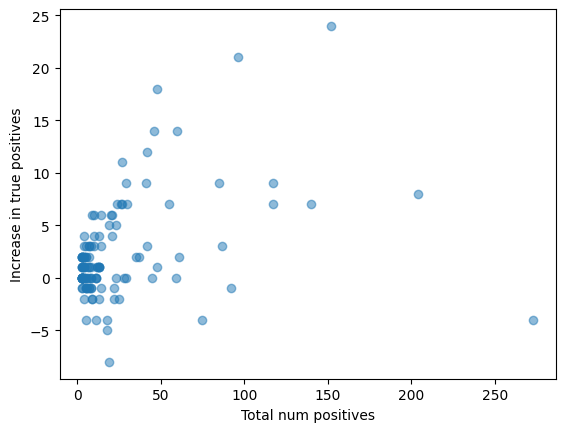

In [25]:
plt.scatter([len(tps1[i]) + len(fns1[i]) for i in range(len(tps1))], [(len(tps2[i]) - len(tps1[i])) for i in range(len(tps1))], alpha=0.5)
plt.ylabel("Increase in true positives")
plt.xlabel("Total num positives")
plt.show()

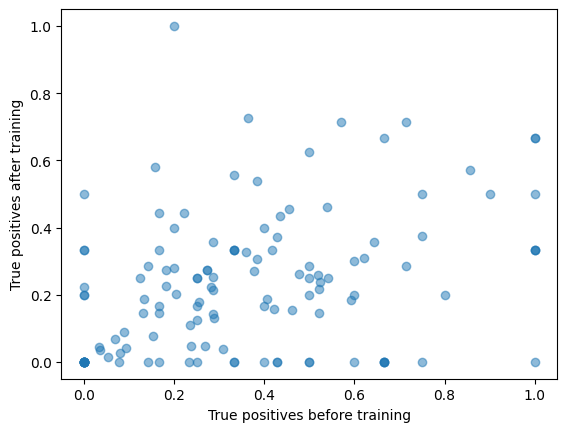

In [19]:
plt.scatter([len(tps2[i]) / (len(tps2[i])+len(fns2[i])) for i in range(len(tps2))], [len(tps1[i]) / (len(tps1[i])+len(fns1[i])) for i in range(len(tps1))], alpha=0.5)
plt.xlabel("True positives before training")
plt.ylabel("True positives after training")
plt.show()


In [5]:
def lens_met(row):
    return mean([len(x.split()) for x in row]) if len(row) > 0 else 0

print(mean([lens_met(tp) for tp in tps]))
print(mean([lens_met(fp) for fp in fps]))
print(mean([lens_met(fn) for fn in fns]))

161.3157923066289
163.1112817055984
179.75629186051205


In [ ]:
ind = 16
print(evset[ind]['question'])
# print(tps[ind])
print("found ", len(tps[ind]), "missed ", len(fns[ind]))
print("TRUE POSITIVES")
for t in list(tps[ind])[:5]:
    print("***\n", t)
print("FALSE POSITIVES")
for f in list(fps[ind])[:5]:
    print("***\n", f)
print("FALSE NEGATIVES")
for f in list(fns[ind])[:5]:
    print("***\n", f)

What training progressions culminate in specialized roles?
found  1 missed  4
TRUE POSITIVES
***
 Collins studied preclinical medicine at St Hilda’s College, University of Oxford where she was awarded a distinction in her 1st BM and the 1999 Nuffield Prize for Medicine. She went on to study Clinical Medicine at Green Templeton College, University of Oxford where she was awarded a Baber Studentship and the Hobson Mann Clinical Medicine Scholarship. She graduated from the Oxford University Clinical Medical School in 2002 with a BMBCh.Collins trained in Obstetrics and gynaecology in the Thames Valley Deanery during which time she completed a Doctor of Philosophy degree (D.Phil.) in 2012 at the University of Oxford. Her thesis examined automated ultrasound imaging of the placenta and was supervised by Alison Noble and Lawrence Impey. She completed her Sub-Specialist Training in Maternal-Fetal Medicine in 2013.Career 
On graduating from Mountview Academy of Theatre Arts Collins started her 

In [9]:
tpls = [len(tp) for tp in tps]
fpls = [len(fp) for fp in fps]
fnls = [len(fn) for fn in fns]
print("True positives: ", mean(tpls), "False positives: ", mean(fpls), "False negatives: ", mean(fnls))

True positives:  6.559055118110236 False positives:  93.07086614173228 False negatives:  17.52755905511811


In [135]:
# for 1-gram wiki toy task
ds = Dataset.load_from_disk("../propercache/data/datastores/wiki1gramdstore50000balancedcontam")
# load in predictions
preds, golds = pickload("../propercache/cache/setresults/evalwiki1grameval50000samplesbalancedcontam_preds.pkl")
evset = Dataset.load_from_disk("../propercache/data/evalsets/evalwiki1grameval50000samplesbalancedcontam")

In [ ]:
chunks = preds_to_chunks(preds, ds)

In [138]:
# figure out n-gram counts for each chunk
wikidocs = Dataset.load_from_disk("../propercache/data/datastores/wikipedia_docs_10k_decont")

In [139]:
n = 1
chunked_wikidocs = chunk_ds(wikidocs, 10)
ngrammed_wikidocs = chunked_wikidocs.map(lambda x: process_ngrams(x, n), num_proc=1)
allngs_flat = [n for ng in ngrammed_wikidocs['pos_chunks'] for n in ng]
counts = Counter(allngs_flat)

Map (num_proc=1): 100%|██████████| 62598/62598 [00:09<00:00, 6290.70 examples/s]


In [ ]:
tps, fps, fns = getconfs(chunks, golds)
tpcs = [mean([counts[t] for t in tp]) if len(tp) > 0 else 0 for tp in tps]
fpc = [mean([counts[f] for f in fp]) if len(fp) > 0 else 0 for fp in fps]
fnpc = [mean([counts[f] for f in fn]) if len(fn) > 0 else 0 for fn in fns]

NameError: name 'counts' is not defined

In [157]:
tpls = [len(tp) for tp in tps]
fpls = [len(fp) for fp in fps]
fnls = [len(fn) for fn in fns]
print("True positives: ", mean(tpls), "False positives: ", mean(fpls), "False negatives: ", mean(fnls))
print("True positives: ", mean(tpcs), "False positives: ", mean(fpc), "False negatives: ", mean(fnpc))

True positives:  4.723404255319149 False positives:  29.27659574468085 False negatives:  18.106382978723403
True positives:  0 False positives:  0 False negatives:  0


In [132]:
# load in dataset
trainds = DatasetDict.load_from_disk("../propercache/data/colbert_training/wiki1gramtrain50000samplebalanced")

In [133]:
poscnts = [counts[p['positive']] for p in trainds['train']]
negcnts = [counts[n['negative']] for n in trainds['train']]

In [134]:
mean(poscnts), mean(negcnts)

(50.63565776980694, 53.20276400464184)

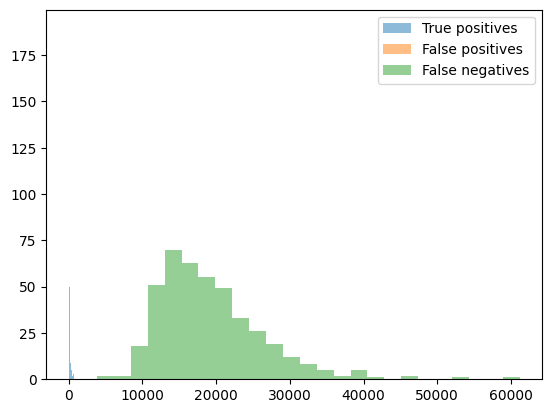

In [99]:
plt.hist(tpcs, bins=25, alpha=0.5, label='True positives')
plt.hist(fpc, bins=25, alpha=0.5, label='False positives')
plt.hist(fnpc, bins=25, alpha=0.5, label='False negatives')
plt.legend()
plt.show()


In [72]:
ind = 19
print(evset[ind]['question'])
print(set(evset[ind]['pos_chunks']))
print(set(chunks[ind]))
print(len(set(evset[ind]['pos_chunks'])), len(set(chunks[ind])))

: Prevent agricultural trade restrictions, market distortions and export subsidies 
The full title for Target 2.b: "Correct and prevent trade restrictions and distortions in world agricultural markets, including the parallel elimination of all forms of agricultural export subsidies and all export measures with equivalent effect, in accordance with the mandate of the Doha Development Round".Target 2.b.
{'equivalent', 'effect', "''", '2.b', 'world', 'prevent', 'and', 'export', 'mandate', 'trade', ',', 'distortions', 'full', 'for', 'agricultural', 'round', 'including', 'market', 'target', 'restrictions', 'title', '``', ':', 'the', 'correct', 'subsidies', 'elimination', 'parallel', 'doha', 'development', 'measures', 'in', 'accordance', '.target', 'all', 'with', 'markets', 'forms', '.', 'of'}
{'preventive', 'harmful.see', 'limitation', 'preventable', 'restricts', 'perturbations', 'perverting', '//worldradiohistory.com/uk/music-and-media/00s/2000/mm-2000-03-18.pdf|website=music', 'restrictio

In [41]:
assert all(a in allchunks for a in evset[1]['pos_chunks'])

In [40]:
allchunks = set(ds['text'])

In [35]:
chunks[0][0]
# TODO some weird issue with duplicates in preds

'conflict-of-interest'

In [22]:
preds[0]

[{'score': 23.462890625,
  'index': 34583,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.462890625,
  'index': 34583,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.445556640625,
  'index': 16016,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.445556640625,
  'index': 16016,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.418212890625,
  'index': 47792,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.418212890625,
  'index': 47792,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.40380859375,
  'index': 29131,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.40380859375,
  'index': 29131,
  'index_id': 'propercache_data_datastores_wiki1gramdstore50000'},
 {'score': 23.39599609375,
  'index': 40550,
  'index_id': 'propercache_data_datastores_wiki1gramdstore5